In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [11]:
chtoidx = {}
idxtoch = {}
raw = []
n = 1
for w in words:
    for ch in list(w):
        raw.append(ch)
raw = sorted(list(set(raw)))
idxtoch[0] = '.'
chtoidx['.'] = 0
for r in raw:
    idxtoch[n] = r
    chtoidx[r] = n
    n +=1 

In [12]:
chtoidx

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [13]:
idxtoch

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [21]:
pairs = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        pairs[(ch1, ch2)] = pairs.get((ch1, ch2), 0) + 1

list(pairs.items())[:5]      

[(('.', 'e'), 1531),
 (('e', 'm'), 769),
 (('m', 'm'), 168),
 (('m', 'a'), 2590),
 (('a', '.'), 6640)]

In [15]:
import torch

In [23]:
N = torch.zeros((27, 27), dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = chtoidx[ch1]
        idx2 = chtoidx[ch2]
        N[idx1, idx2] += 1

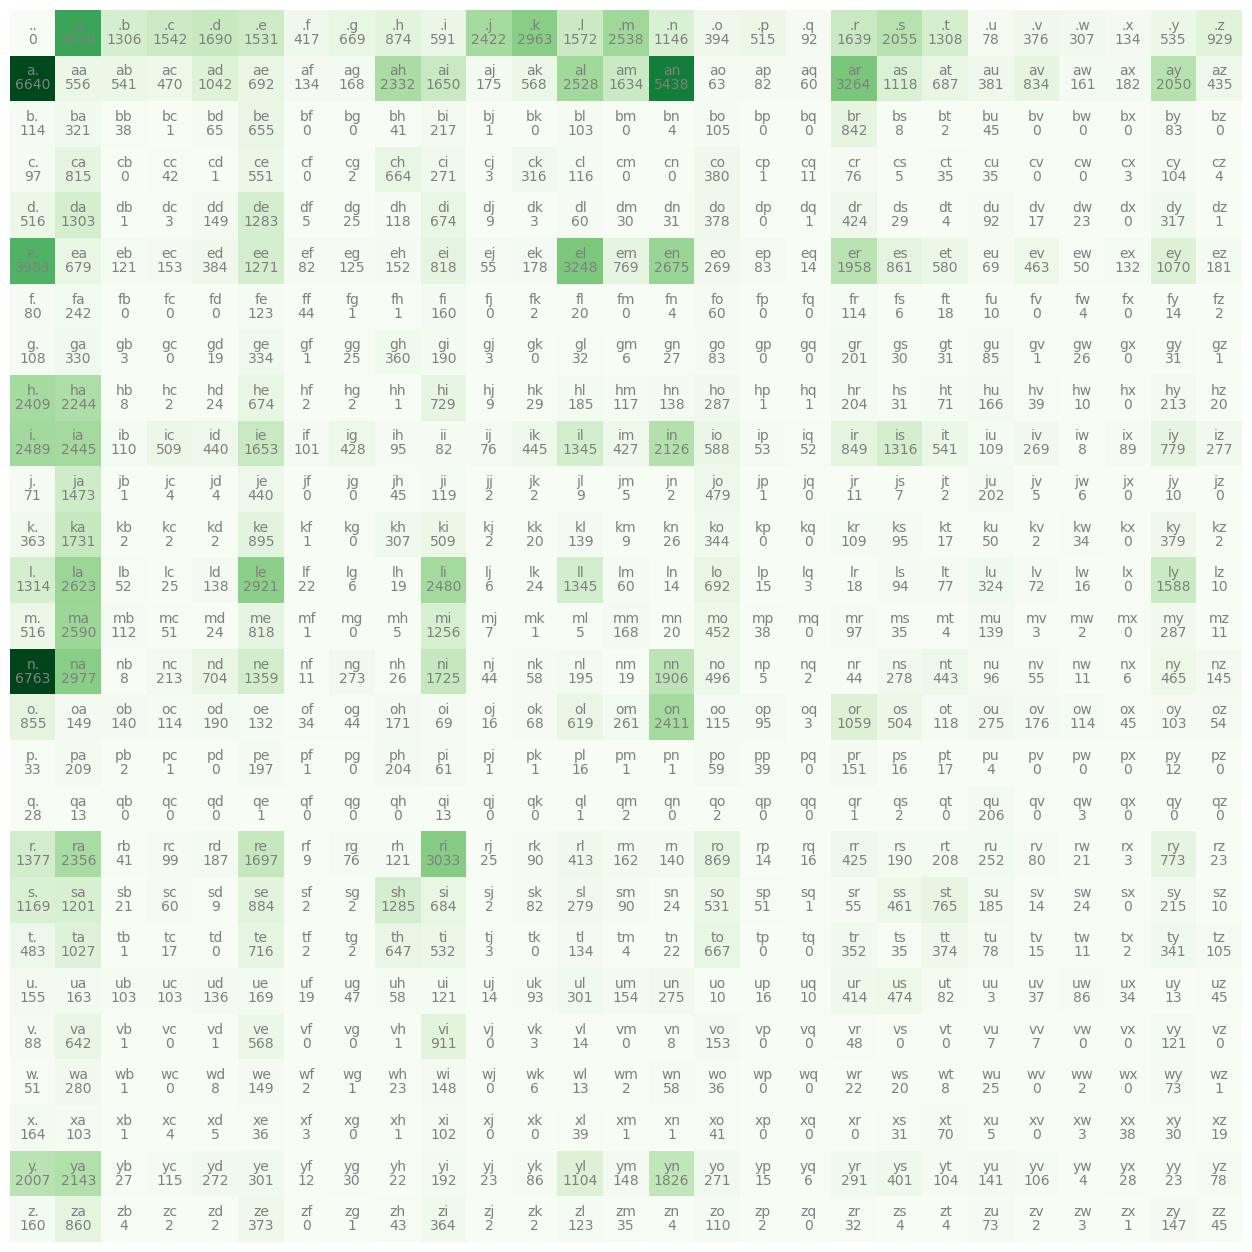

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Greens')
for i in range(27):
    for j in range(27):
        chstr = idxtoch[i] + idxtoch[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [26]:
list(pairs.keys())[:5]

[('.', 'e'), ('e', 'm'), ('m', 'm'), ('m', 'a'), ('a', '.')]

In [27]:
P = (N+1).float()

In [29]:
P = P / P.sum(1, keepdim=True)

In [30]:
P[0,0]

tensor(3.1192e-05)

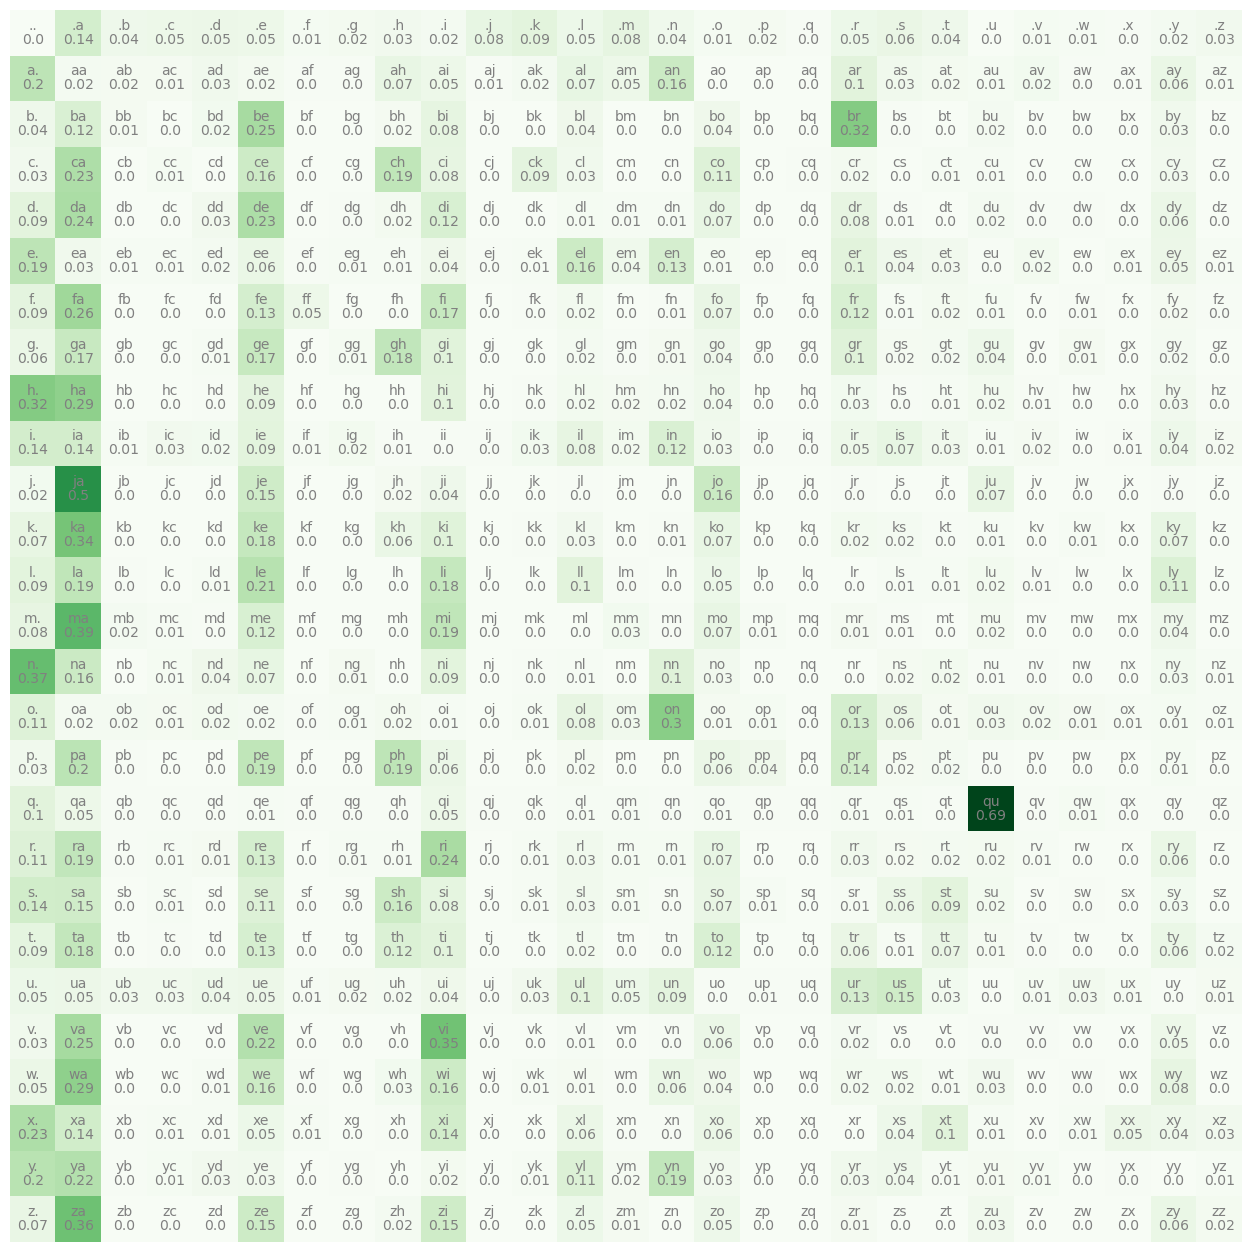

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Greens')
for i in range(27):
    for j in range(27):
        chstr = idxtoch[i] + idxtoch[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, round(P[i, j].item(),2), ha="center", va="top", color='gray')
plt.axis('off');

In [37]:
P[1,:].sum()

tensor(1.)

In [38]:
P[:,1].sum()

tensor(5.3111)

In [43]:
xs = []
ys = []

for x, y in list(pairs.keys())[:5]:
    # print(x, y)
    xs.append(chtoidx[x])
    ys.append(chtoidx[y])
    

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [44]:
xs

tensor([ 0,  5, 13, 13,  1])

In [45]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [46]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])